In [1]:
import pandas as pd
import numpy as np
import os
from PIL import Image
from textblob import TextBlob
import tweepy
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import tweepy
import sys
import jsonpickle

In [2]:
#Replace with your CONSUMER_KEY and CONSUMER_SECRET
consumer_key= CONSUMER_KEY
consumer_secret= CONSUMER_SECRET

# Replace the API_KEY and API_SECRET with your application's key and secret.
auth = tweepy.AppAuthHandler(consumer_key, consumer_secret)

api = tweepy.API(auth, wait_on_rate_limit=True,wait_on_rate_limit_notify=True)

if (not api):
    print ("Can't Authenticate")
    sys.exit(-1)

# Continue with rest of code
searchQuery = 'greta+thunberg -filter:retweets '  # this is what we're searching for
maxTweets = 10000 # Some arbitrary large number
tweetsPerQry = 100  # this is the max the API permits
fName = 'greta.txt' # We'll store the tweets in a text file.


# If results from a specific ID onwards are reqd, set since_id to that ID.
# else default to no lower limit, go as far back as API allows
sinceId = None

# If results only below a specific ID are, set max_id to that ID.
# else default to no upper limit, start from the most recent tweet matching the search query.
max_id = -100

tweetCount = 0
print("Downloading max {0} tweets".format(maxTweets))
with open(fName, 'w') as f:
    while tweetCount < maxTweets:
        try:
            if (max_id <= 0):
                if (not sinceId):
                    new_tweets = api.search(q=searchQuery, count=tweetsPerQry,tweet_mode='extended',lang='en')
                else:
                    new_tweets = api.search(q=searchQuery, count=tweetsPerQry,
                                            since_id=sinceId,tweet_mode='extended',lang='en')
            else:
                if (not sinceId):
                    new_tweets = api.search(q=searchQuery, count=tweetsPerQry,
                                            max_id=str(max_id - 1),tweet_mode='extended',lang='en')
                else:
                    new_tweets = api.search(q=searchQuery, count=tweetsPerQry,
                                            max_id=str(max_id - 1),
                                            since_id=sinceId,tweet_mode='extended',lang='en')
            if not new_tweets:
                print("No more tweets found")
                break
            for tweet in new_tweets:
                f.write(tweet.full_text)
            tweetCount += len(new_tweets)
            #print("Downloaded {0} tweets".format(tweetCount))
            max_id = new_tweets[-1].id
        except tweepy.TweepError as e:
            # Just exit if any error
            print("some error : " + str(e))
            break

print ("Downloaded {0} tweets, Saved to {1}".format(tweetCount, fName))


Downloaded 10000 tweets, Saved to greta.txt


In [3]:
text_ = open("greta.txt","r")
text = text_.read()

In [4]:
# Creating a set of STOPWORDS to remove redundancies in my Wordcloud
stopwords = set(STOPWORDS)
stopwords.update(["https","co"])

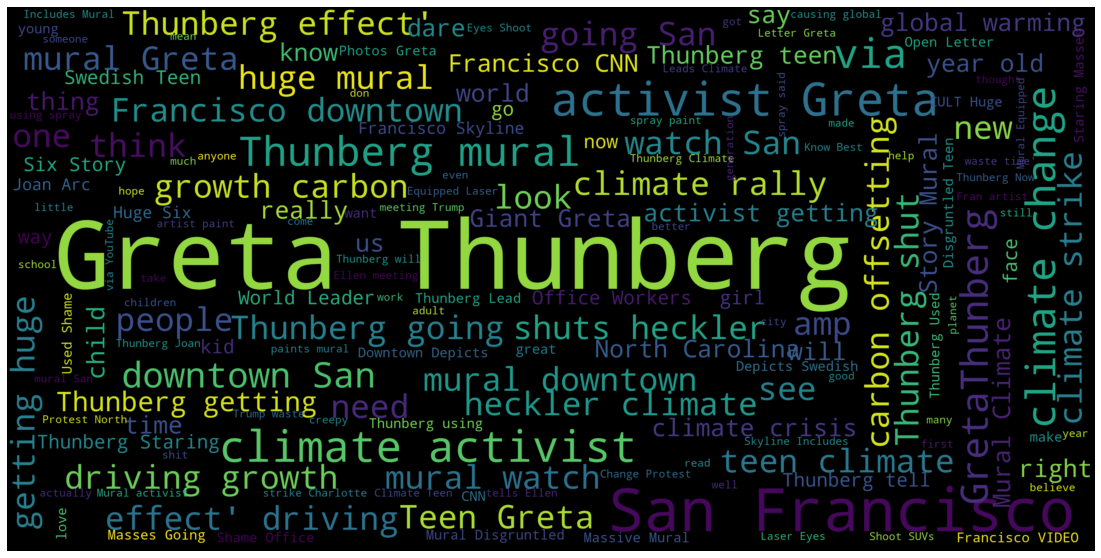

In [5]:
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="black",scale=10).generate(text)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=[20,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()